<a href="https://colab.research.google.com/github/Favour959/Visualizing-the-History-of-Nobel-Prize-Winners/blob/main/Visualizing_the_History_of_Nobel_Prize_Winners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project Title: Analyzing Nobel Prize Winners

##  Project Description
In this project, I analyzed a dataset of Nobel Prize winners using Python (Pandas, Matplotlib, and Seaborn) in Google Colab.

The main goals were:
- To explore trends in gender, nationality, and award categories
- To identify which countries and fields have received the most awards
- To visualize insights

This beginner-friendly analysis helped me practice data cleaning, grouping, and plotting.

📊 Dataset: noble.csv(from datacamp)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

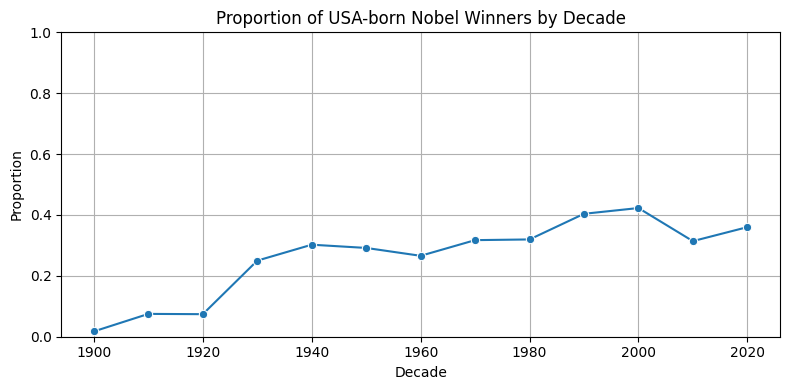

decade                 2020
category         Literature
female_winner           0.5
Name: 68, dtype: object


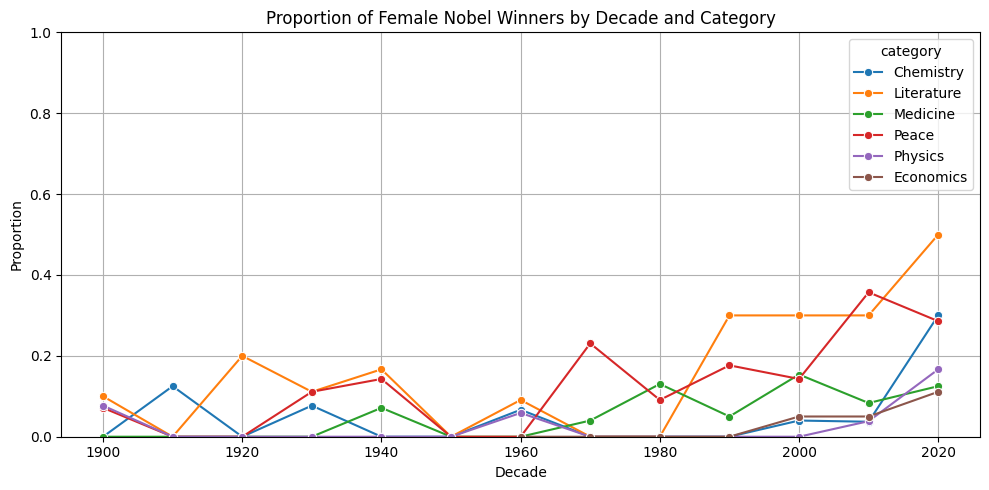

Repeat Nobel winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger']


In [ ]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Nobel Prize dataset
df = pd.read_csv("/nobel.csv")

print(df.head())
#Most commonly awarded gender and birth country
top_gender = df['sex'].value_counts().idxmax()
top_country = df['birth_country'].value_counts().idxmax()

print("The gender with the most Nobel laureates is:", top_gender)
print("The most common birth country of Nobel laureates is:", top_country)


#Calculating proportion of USA-born winners per decade
df['usa_born_winner'] = df['birth_country'] == "United States of America"
df['decade'] = (df['year'] // 10) * 10

prop_usa_winners = df.groupby('decade')['usa_born_winner'].mean().reset_index()

#Find decade with highest proportion
max_decade_usa = prop_usa_winners.sort_values(by='usa_born_winner', ascending=False).iloc[0]['decade']


#Plotting USA born winners
plt.figure(figsize=(8, 4))
sns.lineplot(data=prop_usa_winners, x='decade', y='usa_born_winner', marker='o')
plt.title("Proportion of USA-born Nobel Winners by Decade")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.xlabel("Decade")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Calculating proportion of female winners by decade & category
df['female_winner'] = df['sex'] == 'Female'

prop_female_winners = df.groupby(['decade', 'category'])['female_winner'].mean().reset_index()

# Get the decade-category pair with the highest proportion of female winners
top_female = print(prop_female_winners.sort_values(by='female_winner', ascending=False).iloc[0])
max_female_list = [2020, "Literature"]

#Plotting female winners by category over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', marker='o')
plt.title("Proportion of Female Nobel Winners by Decade and Category")
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.xlabel("Decade")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. First woman to win a Nobel Prize
first_woman = df[df['sex'] == 'Female'].sort_values(by='year').iloc[0]
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

repeat_counts = df['full_name'].value_counts()
repeats = repeat_counts[repeat_counts >= 2].index.tolist()

# Show result
print("Repeat Nobel winners:", repeats)
